In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [7]:
def soft_threshold(coeff, threshold):
    return np.sign(coeff) * np.maximum(np.abs(coeff) - threshold, 0)

In [8]:
def get_frequency_bands(fs, levels):
    bands = [(fs / (2**(level + 1)), fs / (2**level)) for level in range(levels)]
    return bands

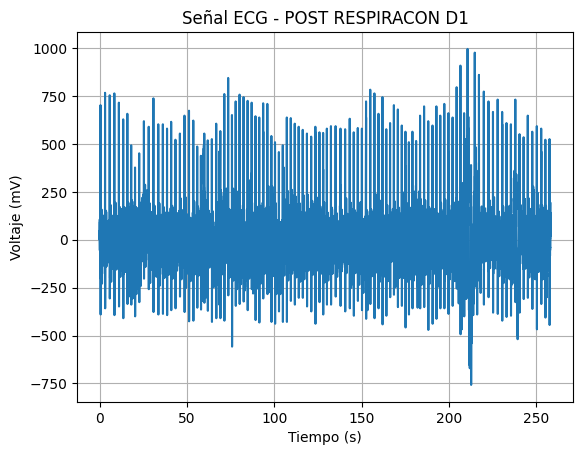

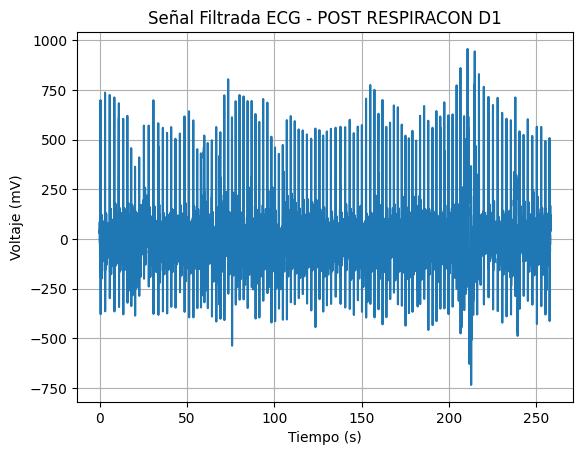

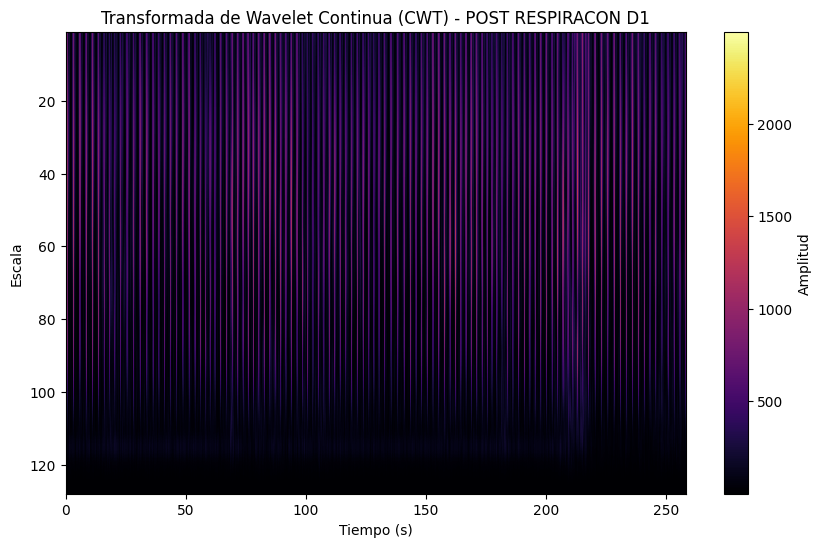

In [9]:
Archivos = ["POST RESPIRACON D1.txt"]
for Archivo in Archivos:
    v = (np.loadtxt(Archivo)[:, -1] - 507) / 1023 * 3.3 * 1000 #convercion mV
    fs = 360 
    N = len(v)
    t = np.linspace(0, N/fs, N)

    wavelet = 'db4'  # Db4
    level = 8  # Descomposición
    coeffs = pywt.wavedec(v, wavelet, level=level)

    # Calcular del umbral 
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(v)))
    bands = get_frequency_bands(fs, level)

    # Coeficientes de 0.15 a 0.5 Hz
    for i, (low, high) in enumerate(bands):
        if low < 0.5 and high > 0.15:
            coeffs[i] = np.zeros_like(coeffs[i])
            
    filtered_coeffs = [soft_threshold(coeff, threshold) for coeff in coeffs]
    v_filtrada = pywt.waverec(filtered_coeffs, wavelet)
    
    plt.plot(t, v)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (mV)')
    plt.title('Señal ECG - ' + Archivo.replace('.txt', ''))
    plt.grid()
    plt.show()
    
    plt.plot(t, v_filtrada)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (mV)')
    plt.title('Señal Filtrada ECG - ' + Archivo.replace('.txt', ''))
    plt.grid()
    plt.show()
    
    # --- Transformada Wavelet Continua (CWT) con Morlet ---
    
    escala = np.arange(1, 128) 
    coeficientes, frecuencias = pywt.cwt(v_filtrada, escala, 'morl', sampling_period=1/fs)

    # Graficar los coeficientes de la CWT
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coeficientes), extent=[0, N/fs, 1, 128], aspect='auto', cmap='inferno')
    plt.colorbar(label='Amplitud')
    plt.title('Transformada de Wavelet Continua (CWT) - ' + Archivo.replace('.txt', ''))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Escala')
    plt.gca().invert_yaxis()  # Invertir el eje de la escala para que las frecuencias altas estén en la parte superior
    plt.show()